In [1]:
import pandas as pd
import numpy as np

# Configuración de la semilla para reproducibilidad
np.random.seed(42)

# Generar datos sintéticos
n = 200  # Tamaño de la muestra

# Variables demográficas
edad = np.random.randint(18, 66, n)  # Edad entre 18 y 65 años
genero = np.random.choice(["Masculino", "Femenino", "Otro"], n, p=[0.5, 0.45, 0.05])
antiguedad = np.random.randint(1, 21, n)  # Antigüedad entre 1 y 20 años
puesto = np.random.choice(["Cajero", "Vendedor", "Supervisor", "Gerente"], n, p=[0.4, 0.4, 0.15, 0.05])

# Variables relacionadas con ausentismo laboral
tasa_ausentismo = np.round(np.random.uniform(0, 20, n), 2)  # Porcentaje de días perdidos
tipo_ausencia = np.random.choice(["Justificada", "Injustificada", "Presencial", "Emocional"], n, p=[0.4, 0.3, 0.2, 0.1])
frecuencia_ausencias = np.random.randint(0, 11, n)  # Número de veces ausente (0–10)
duracion_promedio_ausencias = np.round(np.random.uniform(0, 5, n), 2)  # Duración promedio en días

# Factores organizacionales y personales
nivel_estres = np.random.randint(1, 11, n)  # Escala de 1 a 10
satisfaccion_laboral = np.random.randint(1, 11, n)  # Escala de 1 a 10
relacion_lideres = np.random.randint(1, 11, n)  # Escala de 1 a 10
balance_trabajo_vida = np.random.randint(1, 11, n)  # Escala de 1 a 10
competencias_laborales = np.random.randint(1, 11, n)  # Escala de 1 a 10

# Impacto en la productividad
disminucion_productividad = np.round(tasa_ausentismo * 0.5, 2)  # Suponemos que la disminución es proporcional

# Crear DataFrame
data = pd.DataFrame({
    "edad": edad,
    "genero": genero,
    "antiguedad_anos": antiguedad,
    "puestodetrabajo": puesto,
    "tasadeausentismo_porc": tasa_ausentismo,
    "tipodeausencia": tipo_ausencia,
    "frecuenciadeausencias": frecuencia_ausencias,
    "duracionpromediodeausencias_dias": duracion_promedio_ausencias,
    "niveldeestreslaboral": nivel_estres,
    "satisfaccionlaboral": satisfaccion_laboral,
    "relacionconlideres": relacion_lideres,
    "balancetrabajo_vidapersonal": balance_trabajo_vida,
    "competenciaslaborales": competencias_laborales,
    "disminucionenproductividad_porc": disminucion_productividad
})

# Agregar columna 'falto' basada en la frecuencia de ausencias
data['falto'] = (data['frecuenciadeausencias'] > 0).astype(int)

# Mostrar las primeras filas del DataFrame
print(data.head())

# Guardar los datos en un archivo CSV
data.to_csv("datos_sinteticos_ausentismo.csv", index=False)

   edad     genero  antiguedad_anos puestodetrabajo  tasadeausentismo_porc  \
0    56   Femenino               20          Cajero                   6.73   
1    46  Masculino                5      Supervisor                   2.69   
2    32       Otro               12        Vendedor                   1.27   
3    60       Otro               16          Cajero                  19.80   
4    25  Masculino               16      Supervisor                   6.45   

  tipodeausencia  frecuenciadeausencias  duracionpromediodeausencias_dias  \
0    Justificada                      0                              1.13   
1  Injustificada                      8                              0.80   
2  Injustificada                      2                              3.26   
3     Presencial                      3                              1.63   
4     Presencial                      9                              2.95   

   niveldeestreslaboral  satisfaccionlaboral  relacionconlideres  \


In [2]:
data.describe()

,edad,antiguedad_anos,tasadeausentismo_porc,frecuenciadeausencias,duracionpromediodeausencias_dias,niveldeestreslaboral,satisfaccionlaboral,relacionconlideres,balancetrabajo_vidapersonal,competenciaslaborales,disminucionenproductividad_porc,falto
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0000
mean,41.785000,10.505000,9.781800,5.055000,2.477750,5.605000,5.085000,5.790000,5.535000,5.525000,4.891000,0.9100
std,13.836038,5.744998,5.813165,3.358328,1.371045,2.919175,2.638672,2.882263,2.835308,2.763614,2.906514,0.2869
min,18.000000,1.000000,0.090000,0.000000,0.050000,1.000000,1.000000,1.000000,1.000000,1.000000,0.040000,0.0000
25%,30.000000,5.000000,4.380000,2.000000,1.267500,3.000000,3.000000,3.000000,3.000000,3.000000,2.190000,1.0000
50%,42.000000,10.500000,9.435000,5.000000,2.540000,6.000000,5.000000,6.000000,5.500000,5.000000,4.720000,1.0000
75%,54.000000,16.000000,14.835000,8.000000,3.447500,8.000000,7.000000,8.000000,8.000000,8.000000,7.417500,1.0000
max,65.000000,20.000000,19.940000,10.000000,4.960000,10.000000,10.000000,10.000000,10.000000,10.000000,9.970000,1.0000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   edad                              200 non-null    int64  
 1   genero                            200 non-null    object 
 2   antiguedad_anos                   200 non-null    int64  
 3   puestodetrabajo                   200 non-null    object 
 4   tasadeausentismo_porc             200 non-null    float64
 5   tipodeausencia                    200 non-null    object 
 6   frecuenciadeausencias             200 non-null    int64  
 7   duracionpromediodeausencias_dias  200 non-null    float64
 8   niveldeestreslaboral              200 non-null    int64  
 9   satisfaccionlaboral               200 non-null    int64  
 10  relacionconlideres                200 non-null    int64  
 11  balancetrabajo_vidapersonal       200 non-null    int64  
 12  competen

Resumen estadístico:
             edad  antiguedad_anos  tasadeausentismo_porc  \
count  200.000000       200.000000             200.000000   
mean    41.785000        10.505000               9.781800   
std     13.836038         5.744998               5.813165   
min     18.000000         1.000000               0.090000   
25%     30.000000         5.000000               4.380000   
50%     42.000000        10.500000               9.435000   
75%     54.000000        16.000000              14.835000   
max     65.000000        20.000000              19.940000   

       frecuenciadeausencias  duracionpromediodeausencias_dias  \
count             200.000000                        200.000000   
mean                5.055000                          2.477750   
std                 3.358328                          1.371045   
min                 0.000000                          0.050000   
25%                 2.000000                          1.267500   
50%                 5.000000     

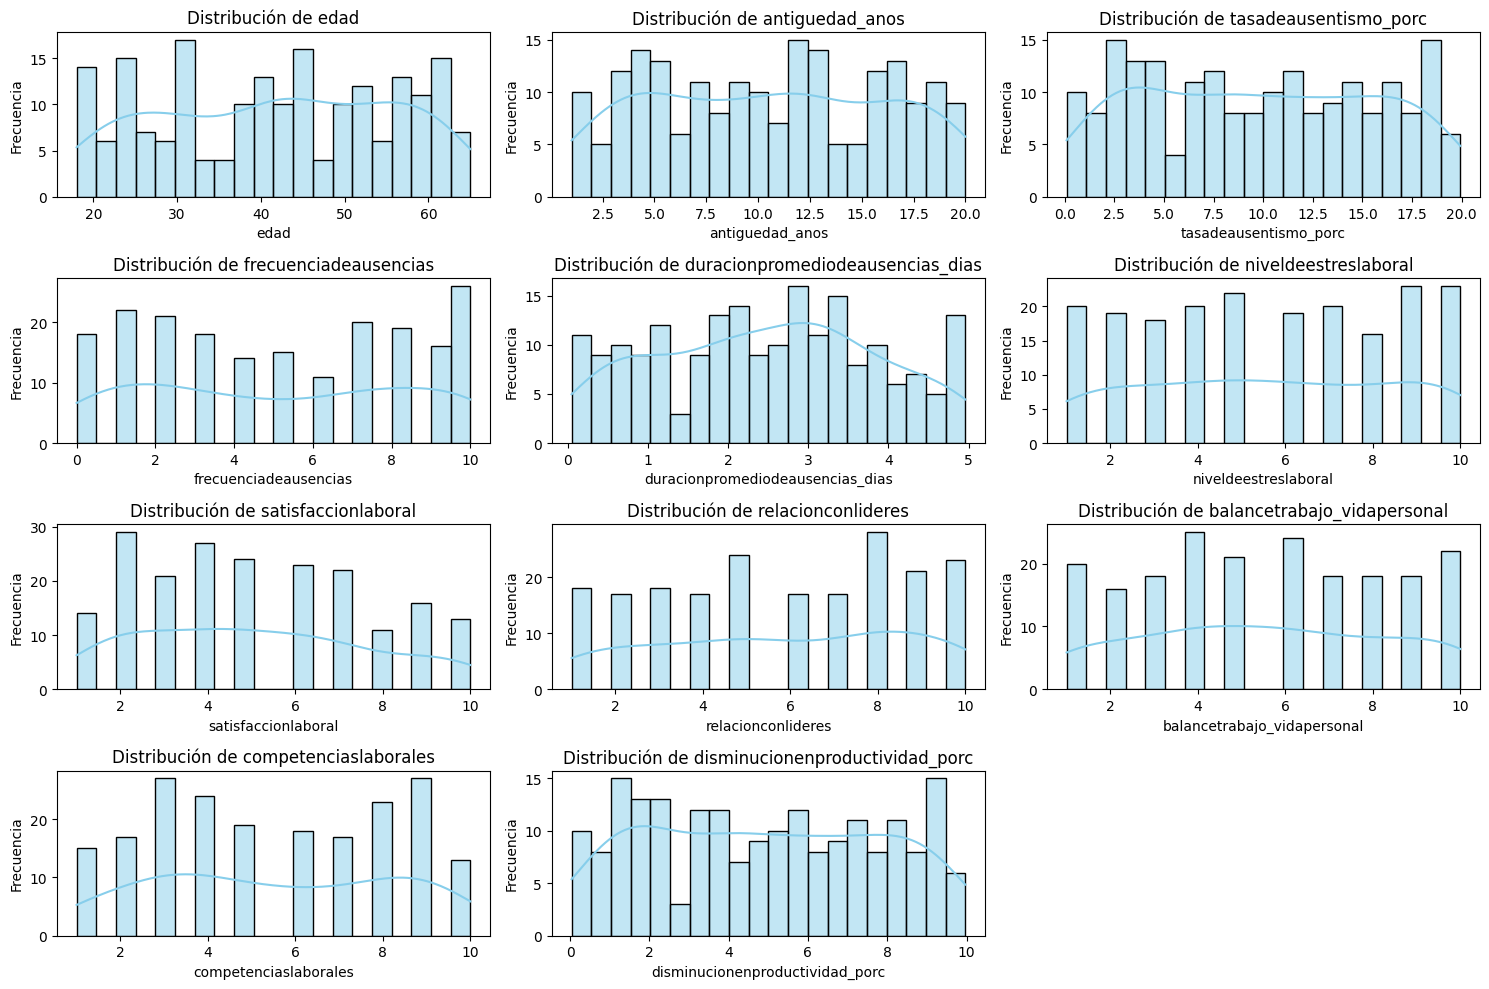

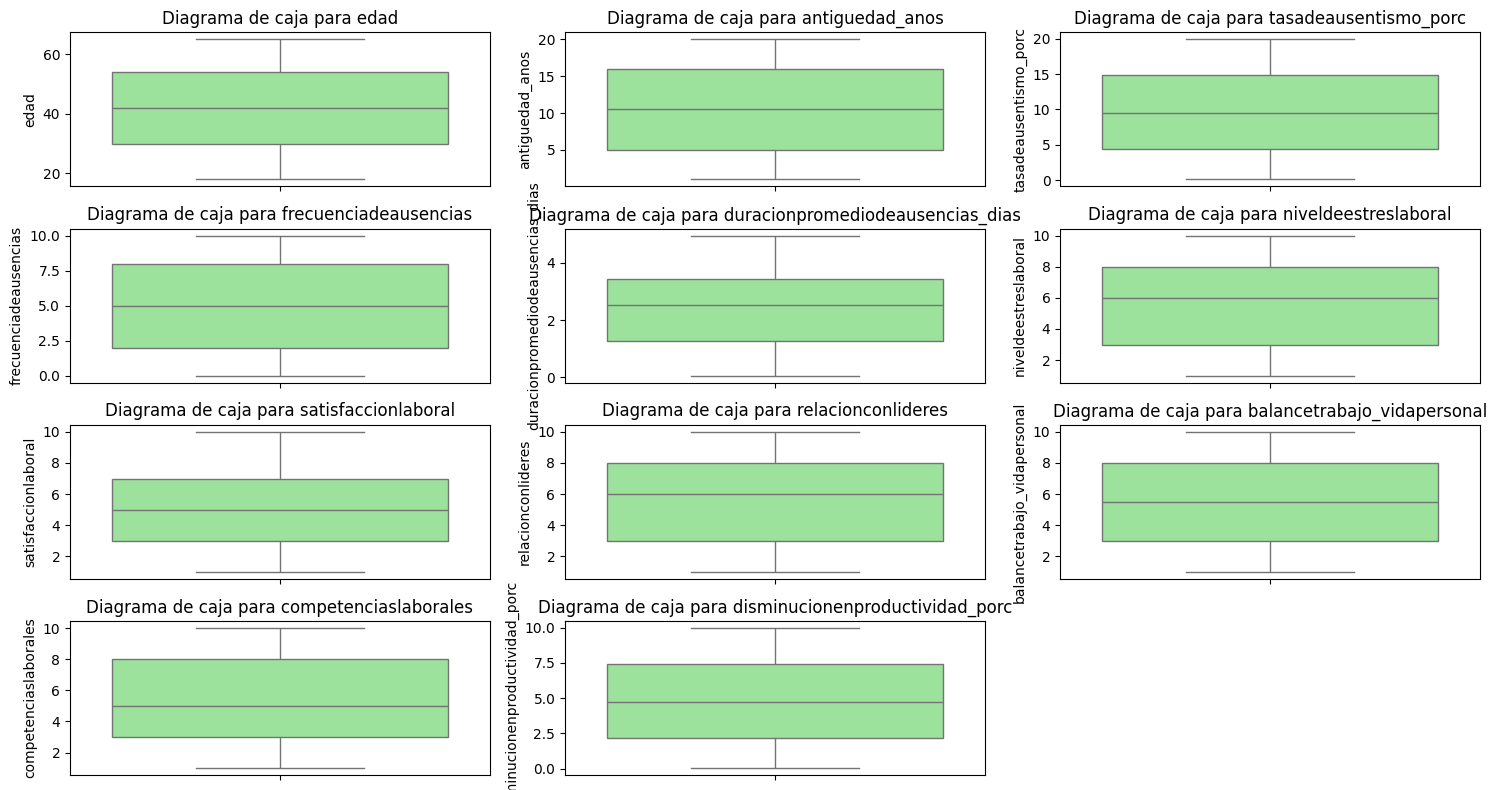

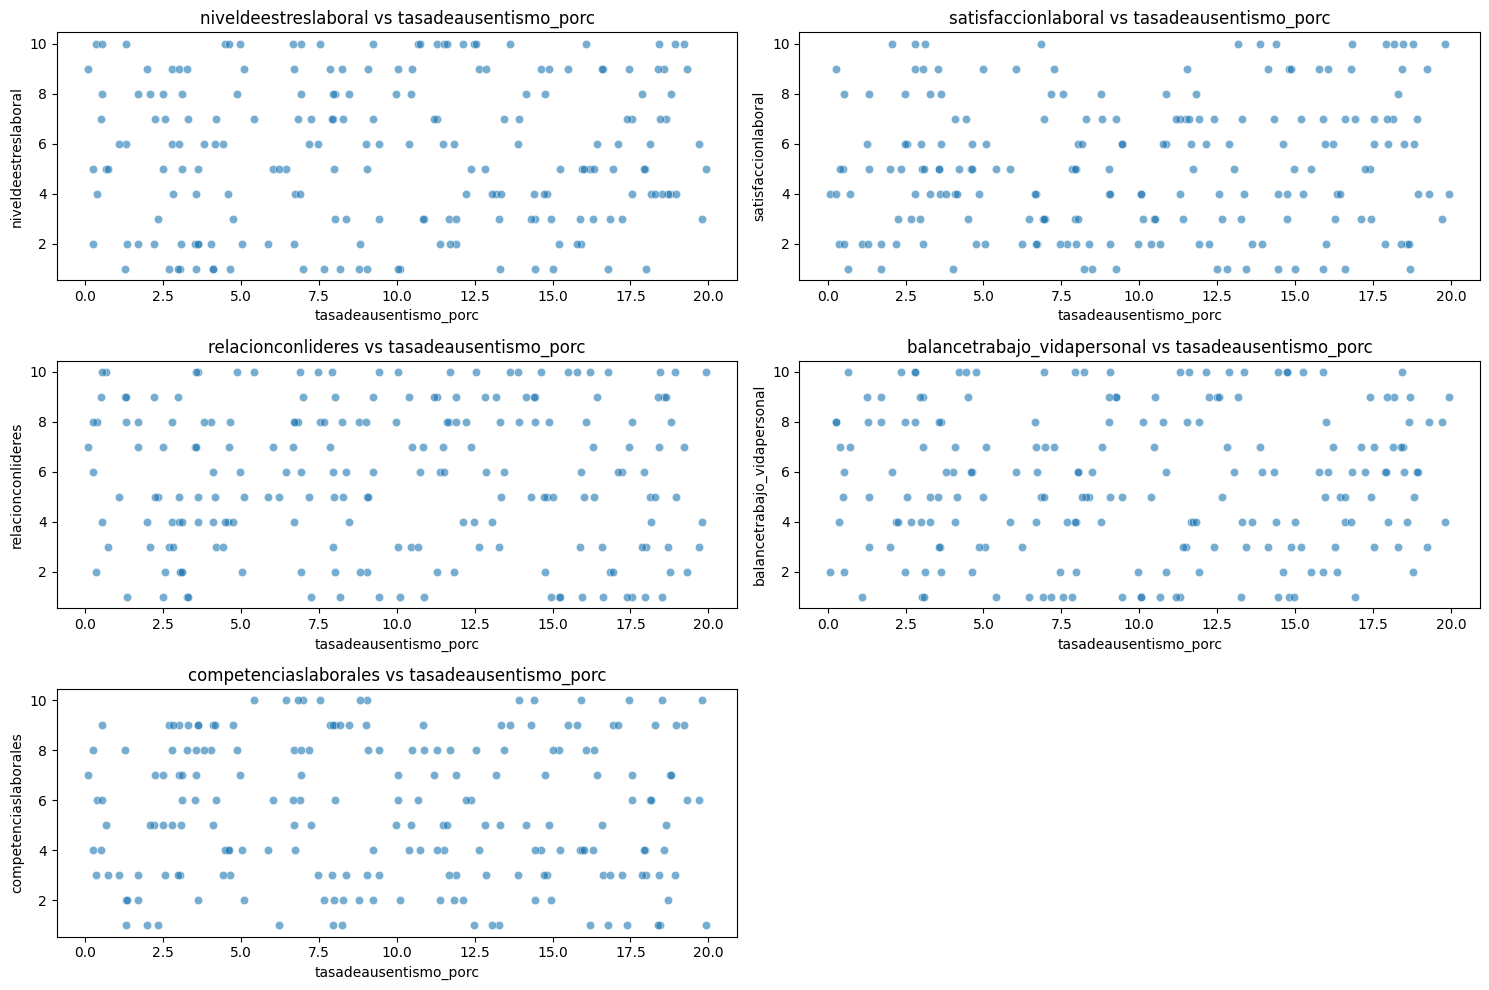

<ipython-input-4-4ac25a90e427>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette="Set2")
<ipython-input-4-4ac25a90e427>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette="Set2")
<ipython-input-4-4ac25a90e427>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette="Set2")


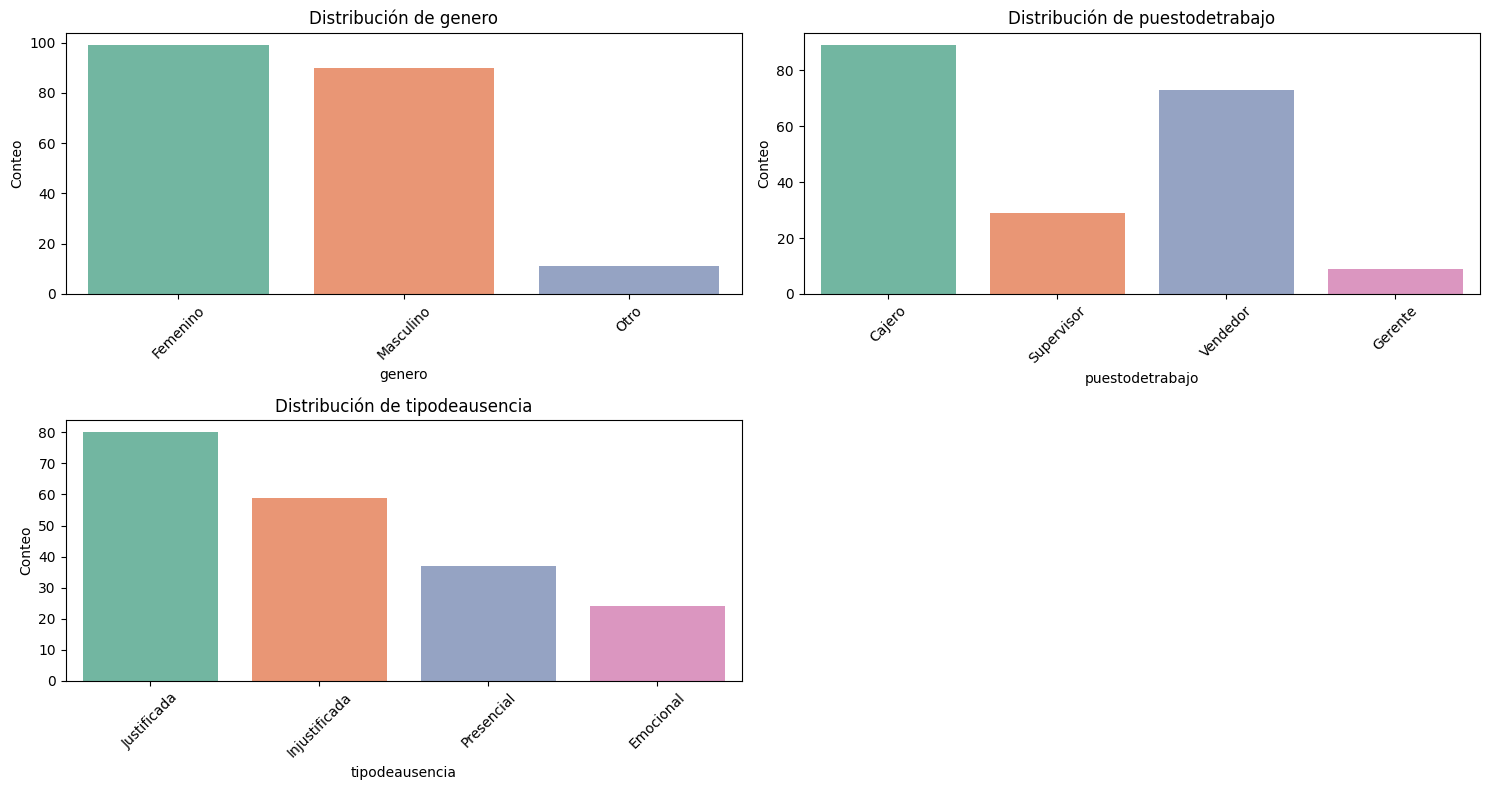

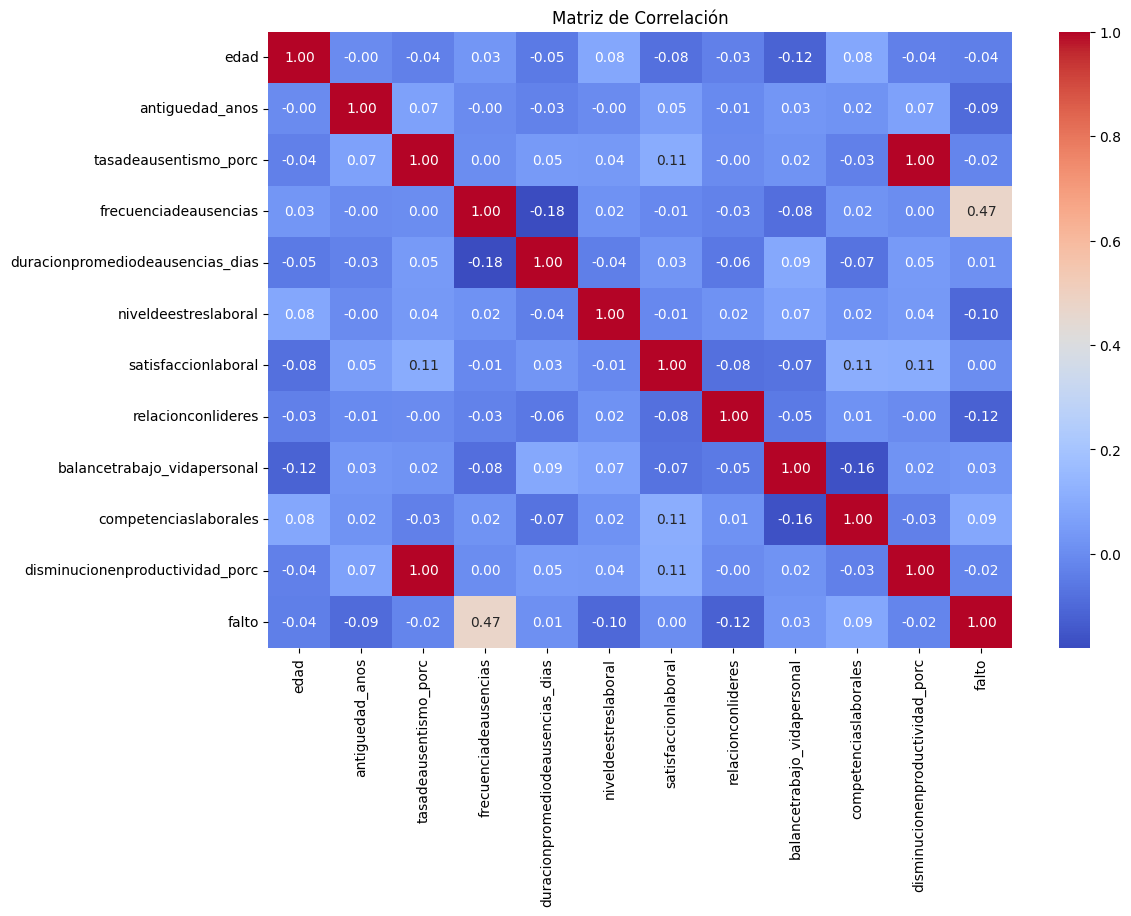

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos sintéticos (si ya está guardado en un archivo CSV)
data = pd.read_csv("datos_sinteticos_ausentismo.csv")

# 1. Resumen estadístico y tipos de datos
print("Resumen estadístico:")
print(data.describe())  # Estadísticas básicas
print("\nInformación del DataFrame:")
print(data.info())  # Tipos de datos y valores nulos

# 2. Visualizar distribuciones de variables clave
def plot_distributions(data):
    plt.figure(figsize=(15, 10))

    # Histogramas para variables numéricas
    numeric_columns = [
        "edad", "antiguedad_anos", "tasadeausentismo_porc",
        "frecuenciadeausencias", "duracionpromediodeausencias_dias",
        "niveldeestreslaboral", "satisfaccionlaboral", "relacionconlideres",
        "balancetrabajo_vidapersonal", "competenciaslaborales",
        "disminucionenproductividad_porc"
    ]

    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(4, 3, i)
        sns.histplot(data[column], kde=True, bins=20, color="skyblue")
        plt.title(f"Distribución de {column}")
        plt.xlabel(column)
        plt.ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

plot_distributions(data)

# 3. Diagramas de caja para detectar outliers
def plot_boxplots(data):
    plt.figure(figsize=(15, 8))

    numeric_columns = [
        "edad", "antiguedad_anos", "tasadeausentismo_porc",
        "frecuenciadeausencias", "duracionpromediodeausencias_dias",
        "niveldeestreslaboral", "satisfaccionlaboral", "relacionconlideres",
        "balancetrabajo_vidapersonal", "competenciaslaborales",
        "disminucionenproductividad_porc"
    ]

    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(4, 3, i)
        sns.boxplot(y=data[column], color="lightgreen")
        plt.title(f"Diagrama de caja para {column}")
        plt.ylabel(column)

    plt.tight_layout()
    plt.show()

plot_boxplots(data)

# 4. Gráficos de dispersión para relaciones entre variables
def plot_scatterplots(data):
    plt.figure(figsize=(15, 10))

    # Relaciones clave
    scatter_pairs = [
        ("tasadeausentismo_porc", "niveldeestreslaboral"),
        ("tasadeausentismo_porc", "satisfaccionlaboral"),
        ("tasadeausentismo_porc", "relacionconlideres"),
        ("tasadeausentismo_porc", "balancetrabajo_vidapersonal"),
        ("tasadeausentismo_porc", "competenciaslaborales")
    ]

    for i, (x_col, y_col) in enumerate(scatter_pairs, 1):
        plt.subplot(3, 2, i)
        sns.scatterplot(data=data, x=x_col, y=y_col, alpha=0.6)
        plt.title(f"{y_col} vs {x_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)

    plt.tight_layout()
    plt.show()

plot_scatterplots(data)

# 5. Gráficos de barras para variables categóricas
def plot_categorical(data):
    plt.figure(figsize=(15, 8))

    categorical_columns = ["genero", "puestodetrabajo", "tipodeausencia"]

    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(2, 2, i)
        sns.countplot(data=data, x=column, palette="Set2")
        plt.title(f"Distribución de {column}")
        plt.xlabel(column)
        plt.ylabel("Conteo")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_categorical(data)

# 6. Matriz de correlación
def plot_correlation_matrix(data):
    plt.figure(figsize=(12, 8))
    numeric_data = data.select_dtypes(include=[np.number])  # Seleccionar solo columnas numéricas
    correlation_matrix = numeric_data.corr()

    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriz de Correlación")
    plt.show()

plot_correlation_matrix(data)

In [5]:
#Este codigo es para meter ruido a ala variable y ya que en adelante no estaba presentando
#metricas confiables

import numpy as np

# Fija la semilla para reproducibilidad
np.random.seed(42)

# Copia las etiquetas originales
y_noisy = y.copy()

# Selecciona índices aleatorios para modificar
noise_indices = np.random.choice(len(y), size=int(0.1 * len(y)), replace=False)  # 10% de ruido

# Intercambia las etiquetas (0 -> 1, 1 -> 0)
y_noisy[noise_indices] = 1 - y_noisy[noise_indices]

# Verifica si el ruido fue aplicado
print("Etiquetas originales:", y[:10])
print("Etiquetas con ruido:", y_noisy[:10])

NameError: name 'y' is not defined

In [6]:
#Este codigo es sin aplicar ruido, es importante aplicar ruido ya que las metricas no
#estaban presentando datos reales, estaban presentando datos muy exactos

# Importar bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Cargar el conjunto de datos sintéticos
data = pd.read_csv("datos_sinteticos_ausentismo.csv")

# Resumen estadístico y tipos de datos (ya realizado en tu análisis exploratorio)
print("Resumen estadístico:")
print(data.describe())  # Estadísticas básicas
print("\nInformación del DataFrame:")
print(data.info())  # Tipos de datos y valores nulos

# Codificación de variables categóricas
# Usamos pd.get_dummies para codificar las variables categóricas en formato one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Separar características (X) y variable objetivo (y)
# La variable objetivo ahora es "falto" (binaria: 1 si falto, 0 si no falto)
X = data_encoded.drop(columns=["falto"])  # Características (todas las columnas excepto "falto")
y = data_encoded["falto"]  # Variable objetivo ("falto")

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usamos un 80% para entrenamiento y 20% para prueba, con una semilla para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de variables numéricas
# Usamos StandardScaler para estandarizar las variables numéricas (media 0, desviación estándar 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajustar y transformar los datos de entrenamiento
X_test = scaler.transform(X_test)        # Transformar los datos de prueba usando el mismo escalador

# Verificar las dimensiones de los conjuntos de datos
print("\nDimensiones de los conjuntos de datos:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# Nota: En este punto, los datos están listos para ser utilizados en modelos de Machine Learning.

Resumen estadístico:
             edad  antiguedad_anos  tasadeausentismo_porc  \
count  200.000000       200.000000             200.000000   
mean    41.785000        10.505000               9.781800   
std     13.836038         5.744998               5.813165   
min     18.000000         1.000000               0.090000   
25%     30.000000         5.000000               4.380000   
50%     42.000000        10.500000               9.435000   
75%     54.000000        16.000000              14.835000   
max     65.000000        20.000000              19.940000   

       frecuenciadeausencias  duracionpromediodeausencias_dias  \
count             200.000000                        200.000000   
mean                5.055000                          2.477750   
std                 3.358328                          1.371045   
min                 0.000000                          0.050000   
25%                 2.000000                          1.267500   
50%                 5.000000     

In [16]:
#este codigo tiene ruido y muestra coherencia en las metricasm y que los datos pueden
#ser confiables.


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Datos de ejemplo
X = pd.DataFrame(np.random.rand(100, 5))  # Características
y = pd.Series(np.random.randint(0, 2, 100))  # Etiquetas

# Aplicar ruido
np.random.seed(42)
y_noisy = y.copy()
noise_indices = np.random.choice(len(y), size=int(0.2 * len(y)), replace=False)  # 20% de ruido
y_noisy[noise_indices] = 1 - y_noisy[noise_indices]

# Verificar cambios
print("Índices con ruido:", noise_indices)
print("Diferencias entre etiquetas originales y con ruido:")
print(np.where(y != y_noisy)[0])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=42, stratify=y_noisy)

# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluar modelo
y_pred = model.predict(X_test)
print("Accuracy con ruido:", accuracy_score(y_test, y_pred))

Índices con ruido: [83 53 70 45 44 39 22 80 10  0 18 30 73 33 90  4 76 77 12 31]
Diferencias entre etiquetas originales y con ruido:
[ 0  4 10 12 18 22 30 31 33 39 44 45 53 70 73 76 77 80 83 90]
Accuracy con ruido: 0.45


In [17]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# División estratificada de datos
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Normalización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir modelos
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, max_depth=5, n_estimators=50),
    "XGBoost": XGBClassifier(random_state=42, max_depth=3, n_estimators=50, learning_rate=0.1)
}

# Función para entrenar y evaluar modelos
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_pred_proba)
    }

# Entrenar y evaluar cada modelo
results = {}
for name, model in models.items():
    metrics = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    results[name] = metrics
    print(f"{name} - Métricas: {metrics}")

Logistic Regression - Métricas: {'Accuracy': 0.5, 'Precision': 0.4444444444444444, 'Recall': 0.4444444444444444, 'F1-Score': 0.4444444444444444, 'AUC-ROC': 0.48484848484848486}
Random Forest - Métricas: {'Accuracy': 0.5, 'Precision': 0.46153846153846156, 'Recall': 0.6666666666666666, 'F1-Score': 0.5454545454545454, 'AUC-ROC': 0.5757575757575757}
XGBoost - Métricas: {'Accuracy': 0.4, 'Precision': 0.38461538461538464, 'Recall': 0.5555555555555556, 'F1-Score': 0.45454545454545453, 'AUC-ROC': 0.4242424242424242}


Modelo Logistic Regression guardado como logistic_regression_model.pkl
Métricas de Logistic Regression guardadas en logistic_regression_metrics.json
Logistic Regression - Métricas: {'Accuracy': 0.5, 'Precision': 0.4444444444444444, 'Recall': 0.4444444444444444, 'F1-Score': 0.4444444444444444, 'AUC-ROC': 0.48484848484848486}
Modelo Random Forest guardado como random_forest_model.pkl
Métricas de Random Forest guardadas en random_forest_metrics.json
Random Forest - Métricas: {'Accuracy': 0.5, 'Precision': 0.46153846153846156, 'Recall': 0.6666666666666666, 'F1-Score': 0.5454545454545454, 'AUC-ROC': 0.5757575757575757}
Modelo XGBoost guardado como xgboost_model.pkl
Métricas de XGBoost guardadas en xgboost_metrics.json
XGBoost - Métricas: {'Accuracy': 0.4, 'Precision': 0.38461538461538464, 'Recall': 0.5555555555555556, 'F1-Score': 0.45454545454545453, 'AUC-ROC': 0.4242424242424242}


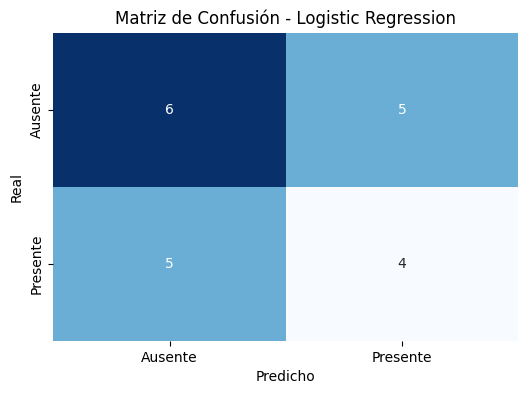

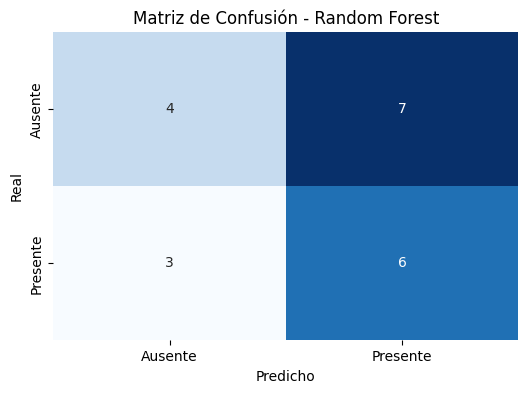

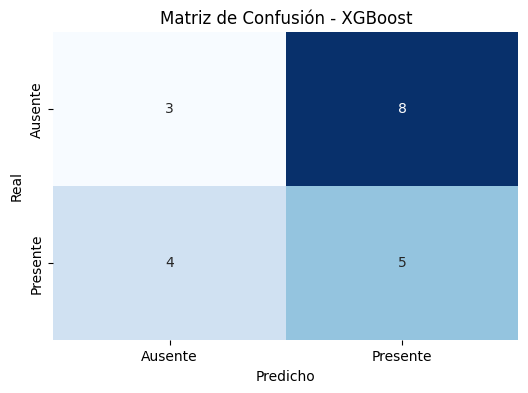

In [18]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib  # Para guardar modelos y el scaler
import json  # Para guardar las métricas en formato JSON

# División estratificada de datos
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Normalización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Guardar el scaler (útil para futuras predicciones)
joblib.dump(scaler, "scaler.pkl")

# Definir modelos
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, max_depth=5, n_estimators=50),
    "XGBoost": XGBClassifier(random_state=42, max_depth=3, n_estimators=50, learning_rate=0.1)
}

# Función para entrenar y evaluar modelos
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_pred_proba),
        "y_pred": y_pred  # Agregar las predicciones al resultado
    }

# Función para graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Ausente", "Presente"], yticklabels=["Ausente", "Presente"])
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()

# Entrenar y evaluar cada modelo
results = {}
predictions = {}  # Diccionario para almacenar las predicciones de cada modelo
for name, model in models.items():
    # Entrenar y evaluar el modelo
    metrics = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    results[name] = metrics
    predictions[name] = metrics.pop("y_pred")  # Guardar las predicciones y eliminarlas de los resultados

    # Guardar el modelo entrenado
    model_filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, model_filename)
    print(f"Modelo {name} guardado como {model_filename}")

    # Guardar las métricas en un archivo JSON
    metrics_filename = f"{name.replace(' ', '_').lower()}_metrics.json"
    with open(metrics_filename, "w") as f:
        json.dump(metrics, f)
    print(f"Métricas de {name} guardadas en {metrics_filename}")

    # Mostrar las métricas en la consola
    print(f"{name} - Métricas: {metrics}")

# Generar matrices de confusión para cada modelo
for name, y_pred in predictions.items():
    plot_confusion_matrix(y_test, y_pred, name)

<ipython-input-19-8ae219c9ebd5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_values, palette="viridis")


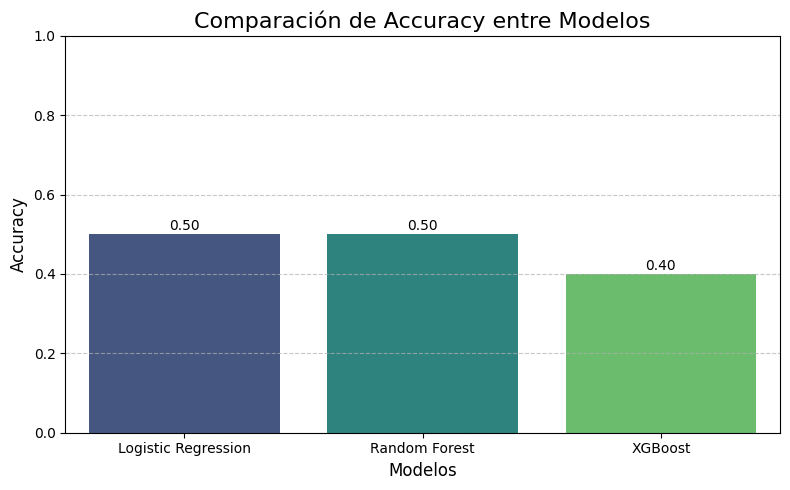

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes los resultados de accuracy para cada modelo
# Estos valores pueden provenir de la evaluación previa de tus modelos
accuracy_scores = {
    "Logistic Regression": 0.5,
    "Random Forest": 0.5,
    "XGBoost": 0.4
}

# Convertir el diccionario en listas para facilitar la visualización
model_names = list(accuracy_scores.keys())
accuracy_values = list(accuracy_scores.values())

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracy_values, palette="viridis")
plt.title("Comparación de Accuracy entre Modelos", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Modelos", fontsize=12)
plt.ylim(0, 1)  # Limitar el eje y entre 0 y 1 (valores de accuracy)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar los valores de accuracy encima de las barras
for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.01, f"{value:.2f}", ha='center', fontsize=10, color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

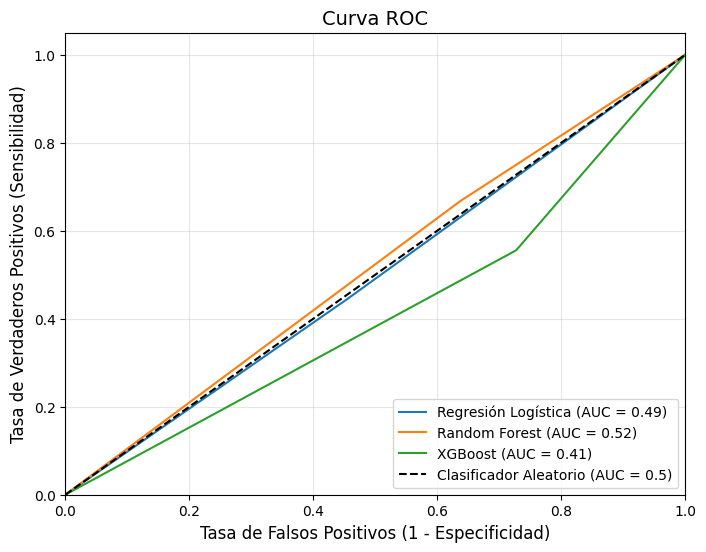

In [20]:
# Función para graficar la curva ROC
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def plot_roc_curve(y_true, y_pred_probas, model_names):
    plt.figure(figsize=(8, 6))

    for i, y_pred_proba in enumerate(y_pred_probas):
        # Calcular la tasa de falsos positivos (fpr), la tasa de verdaderos positivos (tpr) y los umbrales
        fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

        # Calcular el AUC (Área bajo la curva)
        roc_auc = auc(fpr, tpr)

        # Graficar la curva ROC para el modelo actual
        plt.plot(fpr, tpr, label=f"{model_names[i]} (AUC = {roc_auc:.2f})")

    # Línea diagonal que representa el rendimiento de un clasificador aleatorio
    plt.plot([0, 1], [0, 1], 'k--', label="Clasificador Aleatorio (AUC = 0.5)")

    # Personalización del gráfico
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Tasa de Falsos Positivos (1 - Especificidad)", fontsize=12)
    plt.ylabel("Tasa de Verdaderos Positivos (Sensibilidad)", fontsize=12)
    plt.title("Curva ROC", fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(alpha=0.3)

    # Mostrar el gráfico
    plt.show()

# Probabilidades predichas por cada modelo
y_pred_probas = [predictions["Logistic Regression"], predictions["Random Forest"], predictions["XGBoost"]]
model_names = ["Regresión Logística", "Random Forest", "XGBoost"]

# Graficar la curva ROC
plot_roc_curve(y_test, y_pred_probas, model_names)

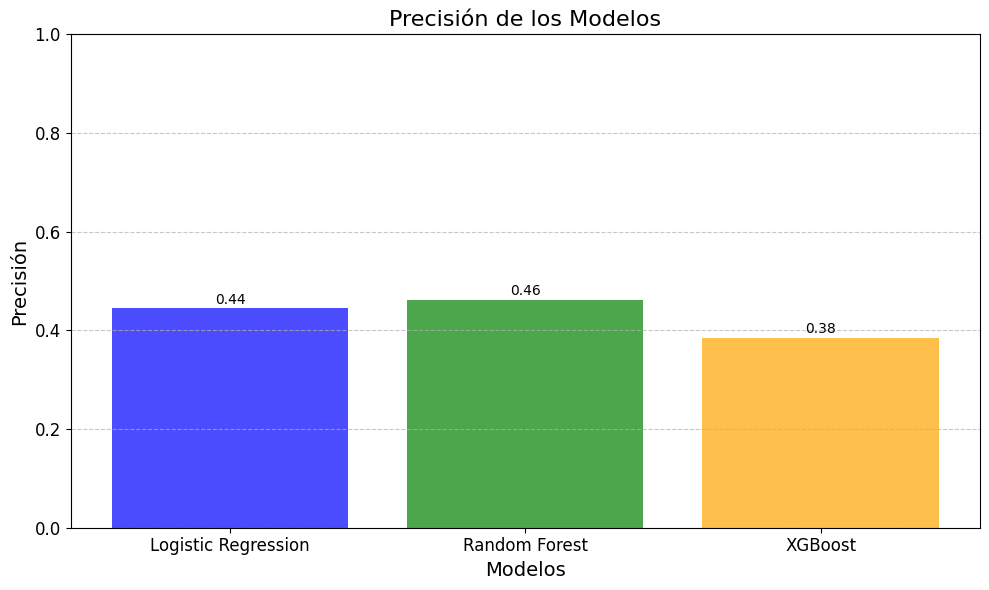

In [21]:
# Importar bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np

# Extraer las métricas de precisión de los resultados
model_names = list(results.keys())
precision_scores = [results[name]["Precision"] for name in model_names]

# Crear la gráfica de barras para la precisión
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, precision_scores, color=['blue', 'green', 'orange'], alpha=0.7)

# Agregar etiquetas de precisión en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01, f"{height:.2f}", ha='center', fontsize=10)

# Personalizar el gráfico
plt.title("Precisión de los Modelos", fontsize=16)
plt.ylabel("Precisión", fontsize=14)
plt.xlabel("Modelos", fontsize=14)
plt.ylim(0, 1)  # La precisión está en el rango [0, 1]
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

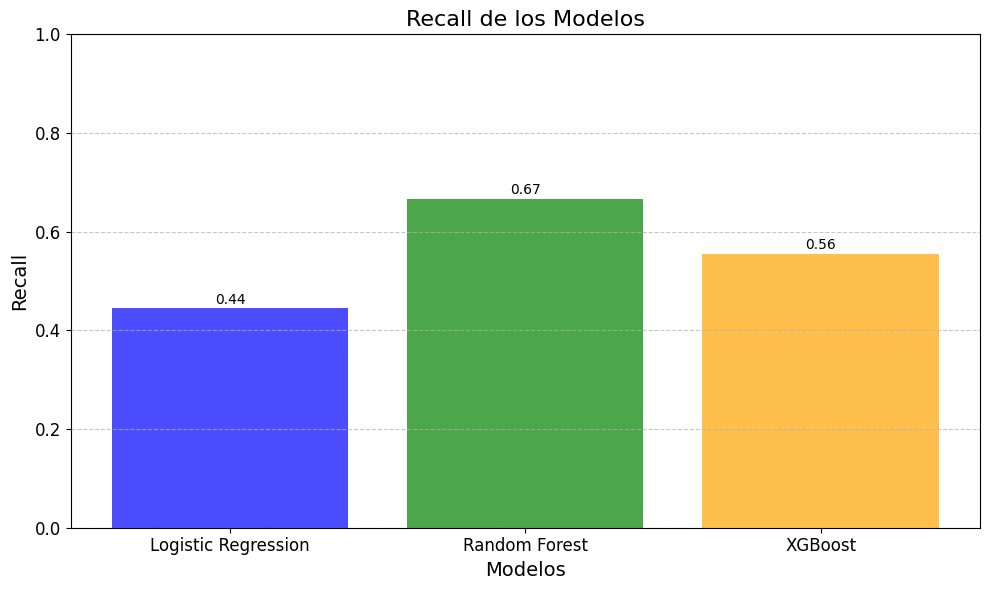

In [22]:
# Importar bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np

# Extraer las métricas de recall de los resultados
model_names = list(results.keys())
recall_scores = [results[name]["Recall"] for name in model_names]

# Crear la gráfica de barras para el recall
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, recall_scores, color=['blue', 'green', 'orange'], alpha=0.7)

# Agregar etiquetas de recall en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01, f"{height:.2f}", ha='center', fontsize=10)

# Personalizar el gráfico
plt.title("Recall de los Modelos", fontsize=16)
plt.ylabel("Recall", fontsize=14)
plt.xlabel("Modelos", fontsize=14)
plt.ylim(0, 1)  # El recall está en el rango [0, 1]
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

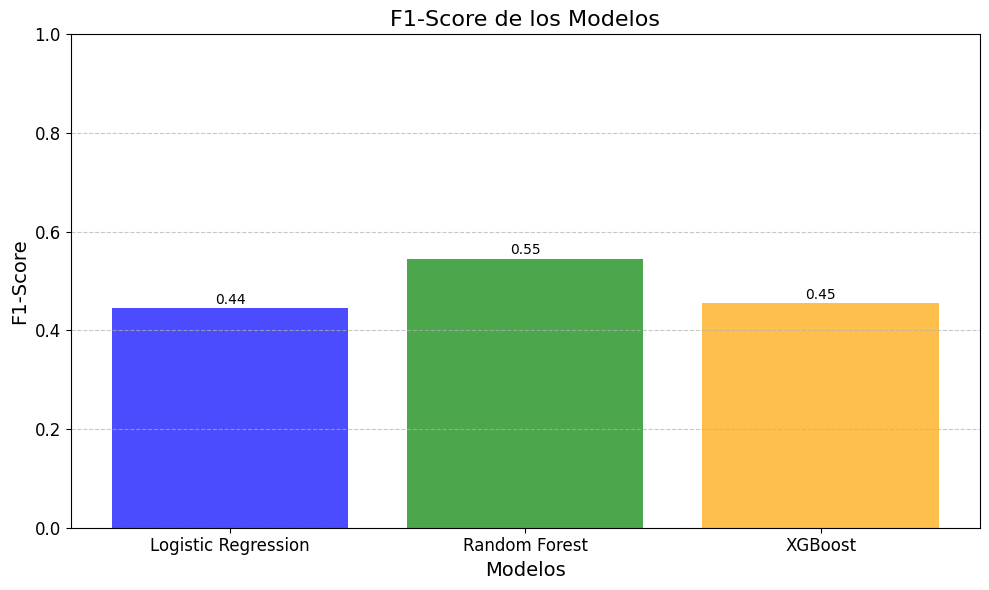

In [23]:
# Importar bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np

# Extraer las métricas de F1-Score de los resultados
model_names = list(results.keys())
f1_scores = [results[name]["F1-Score"] for name in model_names]

# Crear la gráfica de barras para el F1-Score
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, f1_scores, color=['blue', 'green', 'orange'], alpha=0.7)

# Agregar etiquetas de F1-Score en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01, f"{height:.2f}", ha='center', fontsize=10)

# Personalizar el gráfico
plt.title("F1-Score de los Modelos", fontsize=16)
plt.ylabel("F1-Score", fontsize=14)
plt.xlabel("Modelos", fontsize=14)
plt.ylim(0, 1)  # El F1-Score está en el rango [0, 1]
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [15]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [24]:
!pip install pyngrok

In [25]:
from pyngrok import ngrok, conf

# Configurar el authtoken
ngrok.set_auth_token("2syAgHm5LSS0uWh6luo2sZG8hin_4i7CE4XXUx6EeNx3ZmBst")

In [26]:
import streamlit as st
from pyngrok import ngrok

In [19]:
from pyngrok import ngrok

# Configurar el authtoken (asegúrate de que este token sea válido)
ngrok.set_auth_token("2syAgHm5LSS0uWh6luo2sZG8hin_4i7CE4XXUx6EeNx3ZmBst")

# Conectar ngrok a un puerto específico (por ejemplo, 8501 para Streamlit)
public_url = ngrok.connect(addr=8501, proto="http")
print("Link público:", public_url)

Link público: NgrokTunnel: "https://df7f-35-227-107-187.ngrok-free.app" -> "http://localhost:8501"


In [27]:
# Guardar el código en un archivo
with open('app.py', 'w') as f:
    f.write('''# Contenido del archivo app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # Para cargar los modelos
import json  # Para cargar las métricas desde archivos JSON

# Configuración inicial de la página
st.set_page_config(
    page_title="Predicción de Ausentismo Laboral",
    page_icon="📊",
    layout="wide"
)

# Título y descripción general
st.title("📊 Dashboard de Predicción de Ausentismo Laboral")
st.markdown("""
Este dashboard presenta los resultados del análisis y modelado predictivo realizado para predecir el ausentismo laboral
en la empresa retail Galardo de la Ciudad de México.
""")

# Cargar los modelos entrenados
try:
    logistic_regression_model = joblib.load("logistic_regression_model.pkl")
    random_forest_model = joblib.load("random_forest_model.pkl")
    xgboost_model = joblib.load("xgboost_model.pkl")
    st.success("Modelos cargados exitosamente.")
except Exception as e:
    st.error(f"Error al cargar los modelos: {e}")

# Cargar las métricas desde los archivos JSON
try:
    with open("logistic_regression_metrics.json", "r") as f:
        metrics_lr = json.load(f)
    with open("random_forest_metrics.json", "r") as f:
        metrics_rf = json.load(f)
    with open("xgboost_metrics.json", "r") as f:
        metrics_xgb = json.load(f)
    st.success("Métricas cargadas exitosamente.")
except Exception as e:
    st.error(f"Error al cargar las métricas: {e}")

# Crear un diccionario con las métricas de todos los modelos
results = {
    "Logistic Regression": metrics_lr,
    "Random Forest": metrics_rf,
    "XGBoost": metrics_xgb
}

# Convertir los resultados en un DataFrame para visualización
metrics_df = pd.DataFrame(results).T

# Sección 1: Resumen de Métricas
st.header("📋 Resumen de Métricas de Modelos")
st.dataframe(metrics_df.style.highlight_max(axis=0, color="lightgreen"), use_container_width=True)

# Gráfico comparativo de métricas
st.subheader("📈 Comparación de Métricas")
metric_to_plot = st.selectbox("Selecciona una métrica para visualizar", metrics_df.columns)
fig, ax = plt.subplots(figsize=(10, 6))
metrics_df[metric_to_plot].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
ax.set_title(f"Comparación de {metric_to_plot}", fontsize=16)
ax.set_ylabel(metric_to_plot, fontsize=14)
ax.set_xlabel("Modelo", fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
st.pyplot(fig)

# Sección 2: Análisis Exploratorio de Datos
st.header("🔍 Análisis Exploratorio de Datos")
st.markdown("""
En esta sección, se presentan patrones y tendencias identificadas en los datos históricos de ausentismo laboral.
""")

# Simular datos históricos (puedes cargar tus datos reales aquí)
data = {
    "Empleado": [1, 2, 3, 4, 5],
    "Edad": [25, 30, 35, 40, 45],
    "Ausencias": [5, 3, 7, 2, 4],
    "Estrés_Laboral": [8, 6, 9, 5, 7],
    "Satisfacción_Laboral": [7, 8, 6, 9, 5]
}
df = pd.DataFrame(data)

# Mostrar los datos históricos
st.subheader("📊 Datos Históricos de Ausentismo")
st.dataframe(df)

# Sección 3: Hacer predicciones con los modelos cargados
st.header("🔮 Hacer Predicciones")
st.markdown("""
En esta sección, puedes ingresar datos de un empleado para predecir si es probable que se ausente.
""")

# Crear un formulario para ingresar datos
with st.form("prediction_form"):  # Clave única para el formulario
    st.subheader("Ingresa los datos del empleado")
    edad = st.number_input("Edad", min_value=18, max_value=65, value=30)
    estres_laboral = st.number_input("Nivel de Estrés Laboral (1-10)", min_value=1, max_value=10, value=5)
    satisfaccion_laboral = st.number_input("Nivel de Satisfacción Laboral (1-10)", min_value=1, max_value=10, value=7)
    relacion_lideres = st.number_input("Relación Líderes", min_value=0, max_value=100, value=50)  # Característica adicional
    competencias_laborales = st.number_input("Competencias Laborales", min_value=0, max_value=100, value=50)  # Característica adicional
    submit_button = st.form_submit_button("Predecir")

# Hacer predicciones cuando se presiona el botón
if submit_button:
    # Crear un DataFrame con los datos ingresados
    input_data = pd.DataFrame({
        "Edad": [edad],
        "Estrés_Laboral": [estres_laboral],
        "Satisfacción_Laboral": [satisfaccion_laboral],
        "Relación_Líderes": [relacion_lideres],  # Característica adicional
        "Competencias_Laborales": [competencias_laborales]  # Característica adicional
    })

    # Cargar el scaler (si es necesario)
    try:
        scaler = joblib.load("scaler.pkl")
        input_data_scaled = scaler.transform(input_data)
    except Exception as e:
        st.error(f"Error al cargar el scaler: {e}")

    # Hacer predicciones con cada modelo
    st.subheader("Resultados de la Predicción")
    col1, col2, col3 = st.columns(3)

    with col1:
        st.markdown("**Logistic Regression**")
        prediction_lr = logistic_regression_model.predict(input_data_scaled)
        st.write(f"Predicción: {'Ausente' if prediction_lr[0] == 1 else 'Presente'}")

    with col2:
        st.markdown("**Random Forest**")
        prediction_rf = random_forest_model.predict(input_data_scaled)
        st.write(f"Predicción: {'Ausente' if prediction_rf[0] == 1 else 'Presente'}")

    with col3:
        st.markdown("**XGBoost**")
        prediction_xgb = xgboost_model.predict(input_data_scaled)
        st.write(f"Predicción: {'Ausente' if prediction_xgb[0] == 1 else 'Presente'}")''')

# Instalar ngrok
!pip install pyngrok

# Ejecutar Streamlit
from pyngrok import ngrok
public_url = ngrok.connect(addr=8501, proto="http")
print("Link público:", public_url)

# Ejecutar la aplicación Streamlit
!streamlit run app.py &>/dev/null&

Link público: NgrokTunnel: "https://8eab-34-57-17-58.ngrok-free.app" -> "http://localhost:8501"
